In [2]:
'''
< 2차 과제 수행 요구사항 >
1. 데이터 수집
    - 공공데이터포털, 공공기관 제공 데이터, 포털 사이트 제공 데이터, 기타 데이터 제공 사이트 활용
    - 수집 방법은 파일 다운로드, Open API 요청, 웹 페이지 크롤링 등 가능한 방법 사용
    - 3개 이상의 데이터 소스 사용
2. 데이터 저장
    - Oracle 데이터베이스에 사용자 계정 생성 : lab02 / lab02
    - 테이블 설계는 eXERD 사용
    - eXERD의 Forward Engineering 기능을 사용해서 테이블 생성
3. 데이터 분석
    - 수집된 데이터를 Pandas DataFrame 등의 자료구조에 저장
    - 기초 통계량, 그룹별 집계, 상관계수 등을 계산하고 의미 분석
    - 시각화를 통해 데이터 정보 파악
    - 최종 처리된 데이터는 데이터베이스에 테이블을 만들어서 저장
'''

'\n< 2차 과제 수행 요구사항 >\n1. 데이터 수집\n    - 공공데이터포털, 공공기관 제공 데이터, 포털 사이트 제공 데이터, 기타 데이터 제공 사이트 활용\n    - 수집 방법은 파일 다운로드, Open API 요청, 웹 페이지 크롤링 등 가능한 방법 사용\n    - 3개 이상의 데이터 소스 사용\n2. 데이터 저장\n    - Oracle 데이터베이스에 사용자 계정 생성 : lab02 / lab02\n    - 테이블 설계는 eXERD 사용\n    - eXERD의 Forward Engineering 기능을 사용해서 테이블 생성\n3. 데이터 분석\n    - 수집된 데이터를 Pandas DataFrame 등의 자료구조에 저장\n    - 기초 통계량, 그룹별 집계, 상관계수 등을 계산하고 의미 분석\n    - 시각화를 통해 데이터 정보 파악\n    - 최종 처리된 데이터는 데이터베이스에 테이블을 만들어서 저장\n'

In [3]:
import numpy as np
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
import time
import os
from selenium.webdriver import Edge
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import oracledb
oracledb.init_oracle_client()

In [4]:
'''
1. 데이터 수집 
    - 구글 올해의 검색어(여행, 2015~2023) : 웹 페이지 크롤링
    - 박스오피스 연도별 매출액 : 파일 다운로드
    - 네이버 검색어 트렌드(여행) : 네이버 API
    - 여행사 주가 : 파일 다운로드
'''

'\n1. 데이터 수집 \n    - 구글 올해의 검색어(여행, 2015~2023) : 웹 페이지 크롤링\n    - 박스오피스 연도별 매출액 : 파일 다운로드\n    - 네이버 검색어 트렌드(여행) : 네이버 API\n    - 여행사 주가 : 파일 다운로드\n'

In [5]:
# 구글 올해의 검색어(2015~2023) : 웹 페이지 크롤링

In [6]:
category_list = []
year_list = []
movie_list = []

browser = Edge()

for n, year in enumerate(range(2015, 2024)):
    year_list.append(year)
    movie_list.append([])  # [[], []]

    time.sleep(3)
    browser.get('https://trends.google.co.kr/trends/yis/' + str(year) + '/KR/?hl=ko')
    time.sleep(3)
    grid_cells = browser.find_elements(By.CSS_SELECTOR, '.grid-cell')
   
    # print(category_list[1].text)
    for i, grid_cell in enumerate(grid_cells):

        header_text = grid_cell.find_element(By.CSS_SELECTOR, '.expandable-list-header-text')
        
        # print(header_text.text)
        if header_text.text.strip() == '영화':

            click_target = grid_cells[i].find_element(By.CSS_SELECTOR, '.show-more')

            browser.execute_script("arguments[0].scrollIntoView({ block: 'center' })", click_target)

            ac = ActionChains(browser)

            ac.move_to_element(grid_cells[i]).perform()
            time.sleep(1)
            grid_cells[i].find_element(By.CSS_SELECTOR, '.show-more').click()

            items = grid_cells[i].find_elements(By.CSS_SELECTOR, '.fe-expandable-list-item')

            for item in items:
                # print(item.text.split('\n')[1])
                # print()

                movie_list[n].append(item.text.split('\n')[1])

        # movie_list.append([item.text])

movie_list  

[['킹스맨',
  '베테랑',
  '암살',
  '간신',
  '스물',
  '인터스텔라',
  '쥬라기 월드',
  '인사이드 아웃',
  '강남 1970',
  '워킹걸'],
 ['아가씨',
  '내부자들',
  '곡성',
  '주토피아',
  '부산행',
  '나의 소녀시대',
  '검사외전',
  '데드풀',
  '수어사이드 스쿼드',
  '파리에서의 마지막 탱고'],
 ['너의 이름은',
  '범죄도시',
  '리얼',
  '택시 운전사',
  '청년 경찰',
  '여교사',
  '스파이더맨: 홈커밍',
  '군함도',
  '목소리의 형태',
  '덩케르크'],
 ['신과함께',
  '마녀',
  '블랙 팬서',
  '보헤미안 랩소디',
  '데드풀 2',
  '너의 결혼식',
  '독전',
  '상류사회',
  '곤지암',
  '데드풀'],
 ['조커',
  '극한직업',
  '기생충',
  '어벤져스: 엔드게임',
  '캡틴 마블',
  '겨울왕국 2',
  '내안의 그놈',
  '악인전',
  '날씨의 아이',
  '스파이더맨: 파 프롬 홈'],
 ['기생충',
  '겨울왕국 2',
  '반도',
  '테넷',
  '남산의 부장들',
  '시동',
  '#살아있다',
  '백두산',
  '정직한 후보',
  '1917'],
 ['귀멸의 칼날: 무한열차편',
  '이터널스',
  '랑종',
  '승리호',
  '블랙 위도우',
  '듄',
  '모가디슈',
  '샹치와 텐 링즈의 전설',
  '크루엘라',
  '베놈 2: 렛 데어 비 카니지'],
 ['범죄도시 2',
  '탑건: 매버릭',
  '닥터 스트레인지: 대혼돈의 멀티버스',
  '한산: 용의 출현',
  '헤어질 결심',
  '헌트',
  '마녀(魔女) Part2. The Other One',
  '비상선언',
  '스파이더맨: 노 웨이 홈',
  '공조2: 인터내셔날'],
 ['오펜하이머',
  '스즈메의 문단속',
  '서울의 봄',
  '범죄도시3',
  '엘리멘탈',
  '더 퍼

In [7]:
dict = {}
for key, values in zip(year_list, movie_list):
    dict.update({key:values})
print(dict)

{2015: ['킹스맨', '베테랑', '암살', '간신', '스물', '인터스텔라', '쥬라기 월드', '인사이드 아웃', '강남 1970', '워킹걸'], 2016: ['아가씨', '내부자들', '곡성', '주토피아', '부산행', '나의 소녀시대', '검사외전', '데드풀', '수어사이드 스쿼드', '파리에서의 마지막 탱고'], 2017: ['너의 이름은', '범죄도시', '리얼', '택시 운전사', '청년 경찰', '여교사', '스파이더맨: 홈커밍', '군함도', '목소리의 형태', '덩케르크'], 2018: ['신과함께', '마녀', '블랙 팬서', '보헤미안 랩소디', '데드풀 2', '너의 결혼식', '독전', '상류사회', '곤지암', '데드풀'], 2019: ['조커', '극한직업', '기생충', '어벤져스: 엔드게임', '캡틴 마블', '겨울왕국 2', '내안의 그놈', '악인전', '날씨의 아이', '스파이더맨: 파 프롬 홈'], 2020: ['기생충', '겨울왕국 2', '반도', '테넷', '남산의 부장들', '시동', '#살아있다', '백두산', '정직한 후보', '1917'], 2021: ['귀멸의 칼날: 무한열차편', '이터널스', '랑종', '승리호', '블랙 위도우', '듄', '모가디슈', '샹치와 텐 링즈의 전설', '크루엘라', '베놈 2: 렛 데어 비 카니지'], 2022: ['범죄도시 2', '탑건: 매버릭', '닥터 스트레인지: 대혼돈의 멀티버스', '한산: 용의 출현', '헤어질 결심', '헌트', '마녀(魔女) Part2. The Other One', '비상선언', '스파이더맨: 노 웨이 홈', '공조2: 인터내셔날'], 2023: ['오펜하이머', '스즈메의 문단속', '서울의 봄', '범죄도시3', '엘리멘탈', '더 퍼스트 슬램덩크', '콘크리트 유토피아', '인어공주', '존 윅 4', '미션 임파서블: 데드 레코닝 PART ONE']}


In [8]:
df = pd.DataFrame(dict)

In [9]:
# 박스오피스 연도별 매출액 : 파일 다운로드

In [10]:
path = r'D:\\doyun\\green-data-analysis2\\teamwork\\2차과제\\team3\\teamwork_data\\KOBIS연도별박스오피스\\'
file_list = os.listdir(path)
print(file_list)
dfs_lst = []
for file_name in file_list:
    df = pd.read_csv(path+file_name, encoding='cp949')
    dfs_lst.append(df)
    print(df)

['연도별박스오피스_2015.csv', '연도별박스오피스_2016.csv', '연도별박스오피스_2017.csv', '연도별박스오피스_2018.csv', '연도별박스오피스_2019.csv', '연도별박스오피스_2020.csv', '연도별박스오피스_2021.csv', '연도별박스오피스_2022.csv', '연도별박스오피스_2023.csv']
        순위               영화명         개봉일                매출액 매출액 점유율  \
0        1               베테랑  2015-08-05    105,168,155,250    6.1%   
1        2                암살  2015-07-22     98,463,132,781    5.7%   
2        3  어벤져스: 에이지 오브 울트론  2015-04-23     88,582,586,366    5.2%   
3        4              국제시장  2014-12-17     69,841,376,134    4.1%   
4        5              내부자들  2015-11-19     56,465,665,657    3.3%   
...    ...               ...         ...                ...     ...   
3452  3305        시바, 인생을 던져  2013-12-19                  0    0.0%   
3453  3305               빅매치  2014-11-27                  0    0.0%   
3454  3305          로마 위드 러브  2013-04-18                  0    0.0%   
3455  3305                지젤  2014-01-23                  0    0.0%   
3456    합계               NaN 

In [11]:
for i in range(len(dfs_lst)):
    dfs_lst[i] = dfs_lst[i][['영화명', '순위', '매출액', '매출액 점유율']]
    dfs_lst[i] = dfs_lst[i].drop(dfs_lst[i].index[-1])
    dfs_lst[i]['순위'] = dfs_lst[i]['순위'].astype(int)
    dfs_lst[i]['매출액'] = pd.to_numeric(dfs_lst[i]['매출액'].str.replace(',', ''))
    dfs_lst[i]['매출액 점유율'] = dfs_lst[i]['매출액 점유율'].str.replace('%', '').astype(float)
dfs_lst

[                        영화명    순위           매출액  매출액 점유율
 0                       베테랑     1  105168155250      6.1
 1                        암살     2   98463132781      5.7
 2          어벤져스: 에이지 오브 울트론     3   88582586366      5.2
 3                      국제시장     4   69841376134      4.1
 4                      내부자들     5   56465665657      3.3
 ...                     ...   ...           ...      ...
 3451  부에노스 아이레스에서 사랑에 빠질 확률  3305             0      0.0
 3452             시바, 인생을 던져  3305             0      0.0
 3453                    빅매치  3305             0      0.0
 3454               로마 위드 러브  3305             0      0.0
 3455                     지젤  3305             0      0.0
 
 [3456 rows x 4 columns],
                 영화명    순위          매출액  매출액 점유율
 0               부산행     1  93178283048      5.3
 1              검사외전     2  77320403264      4.4
 2     캡틴 아메리카: 시빌 워     3  72672111827      4.2
 3                밀정     4  61269783831      3.5
 4                터널     5  575

In [12]:
dfs_lst2 = []
for df, year in zip(dfs_lst, range(2015, 2024)):
    df.insert(0, 'year', year)
    # df['year'] = year
    dfs_lst2.append(df)
dfs_lst

[      year                    영화명    순위           매출액  매출액 점유율
 0     2015                    베테랑     1  105168155250      6.1
 1     2015                     암살     2   98463132781      5.7
 2     2015       어벤져스: 에이지 오브 울트론     3   88582586366      5.2
 3     2015                   국제시장     4   69841376134      4.1
 4     2015                   내부자들     5   56465665657      3.3
 ...    ...                    ...   ...           ...      ...
 3451  2015  부에노스 아이레스에서 사랑에 빠질 확률  3305             0      0.0
 3452  2015             시바, 인생을 던져  3305             0      0.0
 3453  2015                    빅매치  3305             0      0.0
 3454  2015               로마 위드 러브  3305             0      0.0
 3455  2015                     지젤  3305             0      0.0
 
 [3456 rows x 5 columns],
       year            영화명    순위          매출액  매출액 점유율
 0     2016            부산행     1  93178283048      5.3
 1     2016           검사외전     2  77320403264      4.4
 2     2016  캡틴 아메리카: 시빌 워     3  72672

In [13]:
movie_search_list = []
for i, year in zip(range(len(movie_list)), range(2015, 2024)):
    for idx, li  in enumerate(movie_list[i]):
        movie_search_list.append([str(year), li, idx+1])
movie_search_list

[['2015', '킹스맨', 1],
 ['2015', '베테랑', 2],
 ['2015', '암살', 3],
 ['2015', '간신', 4],
 ['2015', '스물', 5],
 ['2015', '인터스텔라', 6],
 ['2015', '쥬라기 월드', 7],
 ['2015', '인사이드 아웃', 8],
 ['2015', '강남 1970', 9],
 ['2015', '워킹걸', 10],
 ['2016', '아가씨', 1],
 ['2016', '내부자들', 2],
 ['2016', '곡성', 3],
 ['2016', '주토피아', 4],
 ['2016', '부산행', 5],
 ['2016', '나의 소녀시대', 6],
 ['2016', '검사외전', 7],
 ['2016', '데드풀', 8],
 ['2016', '수어사이드 스쿼드', 9],
 ['2016', '파리에서의 마지막 탱고', 10],
 ['2017', '너의 이름은', 1],
 ['2017', '범죄도시', 2],
 ['2017', '리얼', 3],
 ['2017', '택시 운전사', 4],
 ['2017', '청년 경찰', 5],
 ['2017', '여교사', 6],
 ['2017', '스파이더맨: 홈커밍', 7],
 ['2017', '군함도', 8],
 ['2017', '목소리의 형태', 9],
 ['2017', '덩케르크', 10],
 ['2018', '신과함께', 1],
 ['2018', '마녀', 2],
 ['2018', '블랙 팬서', 3],
 ['2018', '보헤미안 랩소디', 4],
 ['2018', '데드풀 2', 5],
 ['2018', '너의 결혼식', 6],
 ['2018', '독전', 7],
 ['2018', '상류사회', 8],
 ['2018', '곤지암', 9],
 ['2018', '데드풀', 10],
 ['2019', '조커', 1],
 ['2019', '극한직업', 2],
 ['2019', '기생충', 3],
 ['2019', '어벤져스: 엔드게임', 4],
 [

In [14]:
'''
2. 데이터 저장
    - Oracle 데이터베이스에 사용자 계정 생성 : lab02 / lab02
    - 테이블 설계는 eXERD 사용
    - eXERD의 Forward Engineering 기능을 사용해서 테이블 생성
'''

'\n2. 데이터 저장\n    - Oracle 데이터베이스에 사용자 계정 생성 : lab02 / lab02\n    - 테이블 설계는 eXERD 사용\n    - eXERD의 Forward Engineering 기능을 사용해서 테이블 생성\n'

In [15]:
conn.close()

NameError: name 'conn' is not defined

In [ ]:
# 데이터베이스에 연결
conn = oracledb.connect(user='lab03', password='lab03', dsn='127.0.0.1:1521/xe') # dsn:data source name
cursor = conn.cursor()  # cursor : 명령실행기
cursor.executemany('insert into movietrendreal values(:1, :2, :3)', movie_search_list)
cursor.execute('commit')  # 이전의 모든 insert 확정
# 연결 종료
conn.close()

In [ ]:
boxoffice = pd.concat(dfs_lst)
all_rows_list = boxoffice.values.tolist()
all_rows_list

[[2015, '베테랑', 1, 105168155250, 6.1],
 [2015, '암살', 2, 98463132781, 5.7],
 [2015, '어벤져스: 에이지 오브 울트론', 3, 88582586366, 5.2],
 [2015, '국제시장', 4, 69841376134, 4.1],
 [2015, '내부자들', 5, 56465665657, 3.3],
 [2015, '사도', 6, 48842902501, 2.8],
 [2015, '킹스맨 : 시크릿 에이전트', 7, 50369009795, 2.9],
 [2015, '미션 임파서블: 로그네이션', 8, 48547353607, 2.8],
 [2015, '연평해전', 9, 45563228330, 2.7],
 [2015, '쥬라기 월드', 10, 47800698826, 2.8],
 [2015, '검은 사제들', 11, 42405282092, 2.5],
 [2015, '히말라야', 12, 39469775448, 2.3],
 [2015, '인사이드 아웃', 13, 38024694936, 2.2],
 [2015, '마션', 14, 39663145295, 2.3],
 [2015, '조선명탐정 : 사라진 놉의 딸', 15, 30456879428, 1.8],
 [2015, '매드 맥스: 분노의 도로', 16, 32912842162, 1.9],
 [2015, '인턴', 17, 28517727148, 1.7],
 [2015, '분노의 질주: 더 세븐', 18, 26454098694, 1.5],
 [2015, '터미네이터 제니시스', 19, 26556715129, 1.5],
 [2015, '스물', 20, 23563421686, 1.4],
 [2015, '극비수사', 21, 22389535897, 1.3],
 [2015, '앤트맨', 22, 23529209937, 1.4],
 [2015, '스타워즈: 깨어난 포스', 23, 24149478540, 1.4],
 [2015, '빅 히어로', 24, 21993119765, 1.3],
 

In [ ]:
# 데이터베이스에 연결
conn = oracledb.connect(user='lab03', password='lab03', dsn='127.0.0.1:1521/xe') # dsn:data source name
cursor = conn.cursor()  # cursor : 명령실행기
cursor.executemany('insert into boxoffice values(:1, :2, :3, :4, :5)', all_rows_list)
cursor.execute('commit')  # 이전의 모든 insert 확정
# 연결 종료
conn.close()

In [ ]:
'''
3. 데이터 분석
    - 구글 올해의 검색어(영화 순위) - 박스오피스 매출액 순위 상관관계
    - 구글 올해의 검색어(게임) - 각 게임사 주가 추이(작년대비변화, 내년변화) 
    - 네이버

    - 시각화를 통해 데이터 정보 파악
    - 최종 처리된 데이터는 데이터베이스에 테이블을 만들어서 저장
'''

'\n3. 데이터 분석\n    - 구글 올해의 검색어(영화 순위) - 박스오피스 매출액 순위 상관관계\n    - 구글 올해의 검색어(게임) - 각 게임사 주가 추이(작년대비변화, 내년변화) \n    - 네이버\n\n    - 시각화를 통해 데이터 정보 파악\n    - 최종 처리된 데이터는 데이터베이스에 테이블을 만들어서 저장\n'

In [ ]:
# 데이터베이스에 연결
conn = oracledb.connect(user='lab03', password='lab03', dsn='127.0.0.1:1521/xe') # dsn:data source name
cursor = conn.cursor()  # cursor : 명령실행기

# SQL 쿼리 작성
sql_query = "SELECT * FROM movietrendreal"
# Pandas의 read_sql_query 함수를 사용하여 DataFrame으로 데이터 불러오기
movie = pd.read_sql_query(sql_query, conn)

# SQL 쿼리 작성
sql_query = "SELECT * FROM boxoffice"
# Pandas의 read_sql_query 함수를 사용하여 DataFrame으로 데이터 불러오기
boxoffice = pd.read_sql_query(sql_query, conn)

# 연결 종료
conn.close()

C:\Users\Administrator.User -2023QBAYC\AppData\Local\Temp\ipykernel_2380\1821018403.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movie = pd.read_sql_query(sql_query, conn)
C:\Users\Administrator.User -2023QBAYC\AppData\Local\Temp\ipykernel_2380\1821018403.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  boxoffice = pd.read_sql_query(sql_query, conn)


In [ ]:
movie, boxoffice

(    YEAR                      NAME  RANKING
 0   2015                       킹스맨        1
 1   2015                       베테랑        2
 2   2015                        암살        3
 3   2015                        간신        4
 4   2015                        스물        5
 ..   ...                       ...      ...
 85  2023                더 퍼스트 슬램덩크        6
 86  2023                 콘크리트 유토피아        7
 87  2023                      인어공주        8
 88  2023                     존 윅 4        9
 89  2023  미션 임파서블: 데드 레코닝 PART ONE       10
 
 [90 rows x 3 columns],
        YEAR              NAME  RANKING       REVENUE  RATIO
 0      2015               베테랑        1  105168155250    6.1
 1      2015                암살        2   98463132781    5.7
 2      2015  어벤져스: 에이지 오브 울트론        3   88582586366    5.2
 3      2015              국제시장        4   69841376134    4.1
 4      2015              내부자들        5   56465665657    3.3
 ...     ...               ...      ...           ...    ...
 40920 

In [ ]:
df = movie.copy()
df['RANKING2'] = np.nan
df['REVENUE'] = np.nan
df['RATIO'] = np.nan
df.head()

,YEAR,NAME,RANKING,RANKING2,REVENUE,RATIO
0,2015,킹스맨,1,NaN,NaN,NaN
1,2015,베테랑,2,NaN,NaN,NaN
2,2015,암살,3,NaN,NaN,NaN
3,2015,간신,4,NaN,NaN,NaN
4,2015,스물,5,NaN,NaN,NaN


In [16]:
boxoffice['RANKING']

NameError: name 'boxoffice' is not defined

In [ ]:
for i in range(len(df)):
    mask = (boxoffice['YEAR'] == df['YEAR'][i]) & (boxoffice['NAME'].str.contains(df['NAME'][i]))
    print(mask)
    selected_info = boxoffice[mask]  # []  selected_info.empty = true


    if selected_info.empty != True:
        # print(selected_info['RANKING'].values[0])
        df.at[i, 'RANKING2'] = selected_info['RANKING'].values[0]
        df.at[i, 'REVENUE'] = selected_info['REVENUE'].values[0]
        df.at[i, 'RATIO'] = selected_info['RATIO'].values[0]

NameError: name 'df' is not defined

In [ ]:
pd.set_option ('display.max_rows', 10)
df

,YEAR,NAME,RANKING,RANKING2,REVENUE,RATIO
0,2015,베테랑,2,1.0,1.051682e+11,6.1
1,2015,암살,3,2.0,9.846313e+10,5.7
2,2015,간신,4,45.0,8.946843e+09,0.5
3,2015,스물,5,20.0,2.356342e+10,1.4
4,2015,인터스텔라,6,117.0,1.699966e+09,0.1
...,...,...,...,...,...,...
75,2023,더 퍼스트 슬램덩크,6,6.0,5.005714e+10,4.0
76,2023,콘크리트 유토피아,7,9.0,3.741280e+10,3.0
77,2023,인어공주,8,40.0,6.668613e+09,0.5
78,2023,존 윅 4,9,16.0,1.995665e+10,1.6


In [ ]:
df = df.dropna().reset_index()

In [ ]:
df = df.drop(['level_0'], axis=1)

KeyError: "['level_0'] not found in axis"

In [ ]:
df = df.drop(['index'], axis=1)

In [ ]:
df

,YEAR,NAME,RANKING,RANKING2,REVENUE,RATIO
0,2015,킹스맨,1,7.0,5.036901e+10,2.9
1,2015,베테랑,2,1.0,1.051682e+11,6.1
2,2015,암살,3,2.0,9.846313e+10,5.7
3,2015,간신,4,45.0,8.946843e+09,0.5
4,2015,스물,5,20.0,2.356342e+10,1.4
...,...,...,...,...,...,...
85,2023,더 퍼스트 슬램덩크,6,6.0,5.005714e+10,4.0
86,2023,콘크리트 유토피아,7,9.0,3.741280e+10,3.0
87,2023,인어공주,8,40.0,6.668613e+09,0.5
88,2023,존 윅 4,9,16.0,1.995665e+10,1.6


In [ ]:
df['RANKING_DIFF'] = abs(df['RANKING'] - df['RANKING2'])
df

,YEAR,NAME,RANKING,RANKING2,REVENUE,RATIO,RANKING_DIFF
0,2015,킹스맨,1,7.0,5.036901e+10,2.9,6.0
1,2015,베테랑,2,1.0,1.051682e+11,6.1,1.0
2,2015,암살,3,2.0,9.846313e+10,5.7,1.0
3,2015,간신,4,45.0,8.946843e+09,0.5,41.0
4,2015,스물,5,20.0,2.356342e+10,1.4,15.0
...,...,...,...,...,...,...,...
85,2023,더 퍼스트 슬램덩크,6,6.0,5.005714e+10,4.0,0.0
86,2023,콘크리트 유토피아,7,9.0,3.741280e+10,3.0,2.0
87,2023,인어공주,8,40.0,6.668613e+09,0.5,32.0
88,2023,존 윅 4,9,16.0,1.995665e+10,1.6,7.0


In [ ]:
diff = df.groupby('YEAR')['RANKING_DIFF'].mean()
diff

YEAR
2015    32.100000
2016    20.777778
2017    50.714286
2018    13.700000
2019    11.000000
2020    11.100000
2021    35.400000
2022     4.125000
2023     6.200000
Name: RANKING_DIFF, dtype: float64

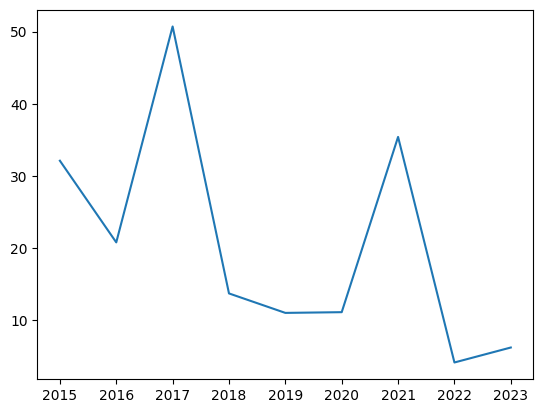

In [ ]:
# 년도별 구글트렌드순위와 박스오피스순위 오차율
plt.plot(diff.index, diff.values)
plt.show()

In [ ]:
revenue = df.groupby('YEAR')['REVENUE'].sum()

In [ ]:
revenue

YEAR
2015    3.929385e+11
2016    3.611966e+11
2017    1.671065e+11
2018    4.190925e+11
2019    6.760626e+11
2020    1.580304e+11
2021    2.006175e+11
2022    3.997881e+11
2023    5.371649e+11
Name: REVENUE, dtype: float64

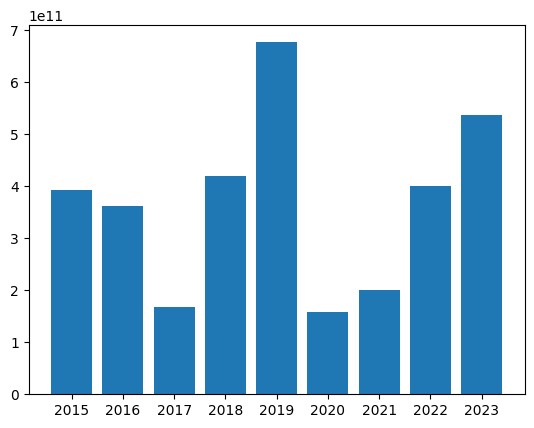

In [ ]:
# 년도별 매출액 추이
plt.bar(revenue.index, revenue.values)
plt.show()

In [ ]:
result = pd.DataFrame({'YEAR':diff.index, 'TREND_DIFF':diff.values, 'REVENUE':revenue.values})
result

,YEAR,TREND_DIFF,REVENUE
0,2015,32.100000,3.929385e+11
1,2016,20.777778,3.611966e+11
2,2017,50.714286,1.671065e+11
3,2018,13.700000,4.190925e+11
4,2019,11.000000,6.760626e+11
5,2020,11.100000,1.580304e+11
6,2021,35.400000,2.006175e+11
7,2022,4.125000,3.997881e+11
8,2023,6.200000,5.371649e+11


In [ ]:
type(result[0][2])
result

[[2015.0, 32.1, 392938508862.0],
 [2016.0, 20.77777777777778, 361196642676.0],
 [2017.0, 50.714285714285715, 167106451025.0],
 [2018.0, 13.7, 419092475741.0],
 [2019.0, 11.0, 676062593441.0],
 [2020.0, 11.1, 158030362940.0],
 [2021.0, 35.4, 200617474590.0],
 [2022.0, 4.125, 399788082328.0],
 [2023.0, 6.2, 537164868384.0]]

In [ ]:
# 데이터베이스에 연결
conn = oracledb.connect(user='lab03', password='lab03', dsn='127.0.0.1:1521/xe') # dsn:data source name
cursor = conn.cursor()  # cursor : 명령실행기

result['YEAR'] = result['YEAR'].astype(int)
result = result.values.tolist()
cursor.executemany('insert into result values(:1, :2, :3)', result)

cursor.execute('commit')  # 이전의 모든 insert 확정
# 연결 종료
conn.close()